In [124]:
# import necessary packages for data analysis
import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

In [125]:
#reading data from the dataset and storing it in a data frame
#head command displays the data as per the number of rows specified

playstore_data = pd.read_csv('googleplaystore.csv')
playstore_data.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [126]:
#checking the data type of playstore_data

type(playstore_data)

pandas.core.frame.DataFrame

In [127]:
#displays the number of rows and columns

playstore_data.shape

(10841, 13)

In [128]:
#printing the data types of columns

print(playstore_data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [129]:
#signfies summary of data

playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


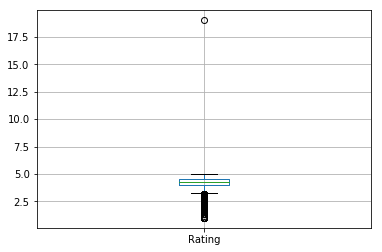

In [130]:
#identifying outliers using boxplot through ratings column

playstore_data.boxplot()

In [131]:
playstore_data[playstore_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [132]:
#dropping the above identified outlier from the dataset

playstore_data.drop([10472],inplace=True)

In [133]:
#verify if the outlier has been dropped

playstore_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,17-May-17,0.0.9,2.3 and up


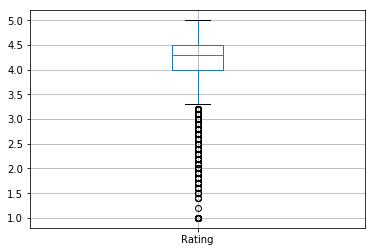

In [134]:
#verifying the boxplot after removing the outlier

playstore_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7CFF4B048>]],
      dtype=object)

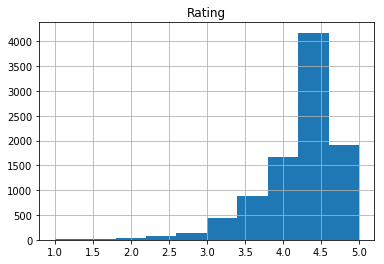

In [135]:
playstore_data.hist()

In [136]:
#prints all the duplicated rows from the dataset

duplicated_data = playstore_data[playstore_data.duplicated()]
print("Duplicated rows in the dataset are as follows")
print(duplicated_data)

Duplicated rows in the dataset are as follows
                                                     App         Category  \
229                         Quick PDF Scanner + OCR FREE         BUSINESS   
236                                                  Box         BUSINESS   
239                                   Google My Business         BUSINESS   
256                                  ZOOM Cloud Meetings         BUSINESS   
261                            join.me - Simple Meetings         BUSINESS   
265                                                  Box         BUSINESS   
266                                             Zenefits         BUSINESS   
267                                           Google Ads         BUSINESS   
268                                   Google My Business         BUSINESS   
269                                                Slack         BUSINESS   
270                                   FreshBooks Classic         BUSINESS   
271                           

In [137]:
#checking the number of duplicated rows identified above

n_duplicated = playstore_data.duplicated(keep="first").sum()
print("There are {}/{} duplicated records.".format(n_duplicated, playstore_data.shape[0]))


There are 483/10840 duplicated records.


In [138]:
#dropping the duplicated rows identified above

playstore_no_dup = playstore_data.drop(playstore_data.index[playstore_data.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(playstore_no_dup.shape[0]))

10357 records after dropping duplicated.


In [139]:
#vrifyimg the number of rows and columns

playstore_no_dup.shape

(10357, 13)

In [140]:
#to check for null values

playstore_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
App               10357 non-null object
Category          10357 non-null object
Rating            8892 non-null float64
Reviews           10357 non-null object
Size              10357 non-null object
Installs          10357 non-null object
Type              10356 non-null object
Price             10357 non-null object
Content Rating    10357 non-null object
Genres            10357 non-null object
Last Updated      10357 non-null object
Current Ver       10349 non-null object
Android Ver       10355 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [141]:
#displays true for null values

playstore_no_dup.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [142]:
playstore_no_dup.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [143]:
#remove columns that are 90% empty. Calculate the threshold length

threshold = len(playstore_no_dup) * 0.1
print(threshold)

1035.7


In [144]:
#remove columns based on threshold length

playstore_no_dup.dropna(thresh=threshold, axis=1, inplace=True)

In [145]:
#check if any columns were dropped

playstore_no_dup.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [146]:
playstore_no_dup.shape

(10357, 13)

In [147]:
#fill missing values with either mean, median or mode. For histogram which is left or right skewed, it is advisable to fill it with median values
#write a function to fill 1465 missing values in rating column

def fill_rating(df):
    return df.fillna(df.median())

In [148]:
#call the above created function and fill the missing value in ratings with median

playstore_no_dup.Rating = playstore_no_dup['Rating'].transform(fill_rating)

In [149]:
#check null values in all columns 
#Rating column should be 0
playstore_no_dup.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [150]:
#fill the missing values in Type, Current Ver and Android Ver columns with mode values of each as they are categorical values

print(playstore_no_dup['Type'].mode())
print(playstore_no_dup['Current Ver'].mode())
print(playstore_no_dup['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [151]:
#Fill the missing values with the mode values above

playstore_no_dup['Type'].fillna(str(playstore_no_dup['Type'].mode().values[0]), inplace=True)
playstore_no_dup['Current Ver'].fillna(str(playstore_no_dup['Current Ver'].mode().values[0]), inplace=True)
playstore_no_dup['Android Ver'].fillna(str(playstore_no_dup['Android Ver'].mode().values[0]), inplace=True)

In [164]:
#check null values in all columns 
#All columns should be 0
playstore_no_dup.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [153]:
#convert price and reviews to numeric 
#Price: Replace $ with blank and than convert to float

playstore_no_dup['Price'] = playstore_no_dup['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
playstore_no_dup['Price'] = playstore_no_dup['Price'].apply(lambda x: float(x))
playstore_no_dup['Reviews'] = pd.to_numeric(playstore_no_dup['Reviews'], errors='coerce')

In [154]:
#Convert installs to numeric
#replace + with blank and , with blank and convert it into float in the last step

playstore_no_dup['Installs'] = playstore_no_dup['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
playstore_no_dup['Installs'] = playstore_no_dup['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_no_dup['Installs'] = playstore_no_dup['Installs'].apply(lambda x: float(x))

In [165]:
print(playstore_no_dup.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [155]:
#verify if changes took place

playstore_no_dup.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [156]:
#summary stats after cleaning the data

playstore_no_dup.describe()

,Rating,Reviews,Installs,Price
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,1.415776e+07,1.030800
std,0.485594,2.696778e+06,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


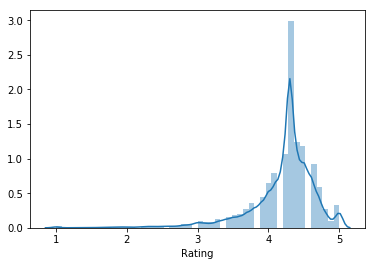

In [161]:
#ratings distribution

sns.distplot(playstore_no_dup.Rating)

In [162]:
print("Number of apps with ratings as 5 are ")
playstore_no_dup.Rating[playstore_no_dup['Rating'] == 5].count()

Number of apps with ratings as 5 are 


271

([<matplotlib.patches.Wedge at 0x1e7d05e7278>,
 [Text(-1.0705172672492242, 0.2529679436633296, 'Free'),
  Text(1.070517267249224, -0.2529679436633297, 'Paid')],
 [Text(-0.5839185094086676, 0.13798251472545248, '92.6%'),
  Text(0.5839185094086676, -0.13798251472545256, '7.4%')])

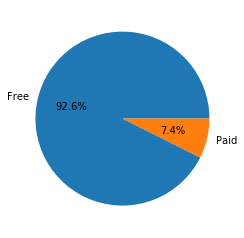

In [163]:
#distribution of free and paid apps

plt.pie(playstore_no_dup.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [157]:
#Group the rating, price and reviews by category

group_data = playstore_no_dup.groupby('Category')
x = group_data['Rating'].agg(np.mean)
print(x)
y = group_data['Price'].agg(np.sum)
print(y)
z = group_data['Reviews'].agg(np.mean)
print(z)



Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.336522
BUSINESS               4.175176
COMICS                 4.160000
COMMUNICATION          4.175410
DATING                 4.033673
EDUCATION              4.375385
ENTERTAINMENT          4.136036
EVENTS                 4.395313
FAMILY                 4.203757
FINANCE                4.148056
FOOD_AND_DRINK         4.183871
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
HOUSE_AND_HOME         4.185000
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.133244
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.212990
NEWS_AND_MAGAZINES     4.160985
PARENTING              4.300000
PERSONALIZATION        4.327062
PHOTOGRAPHY            4.189441
PRODUCTIVITY           4.219410
SHOPPING               4.256250
SOCIAL                 4.260714
SPORTS                 4.239031
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.121941

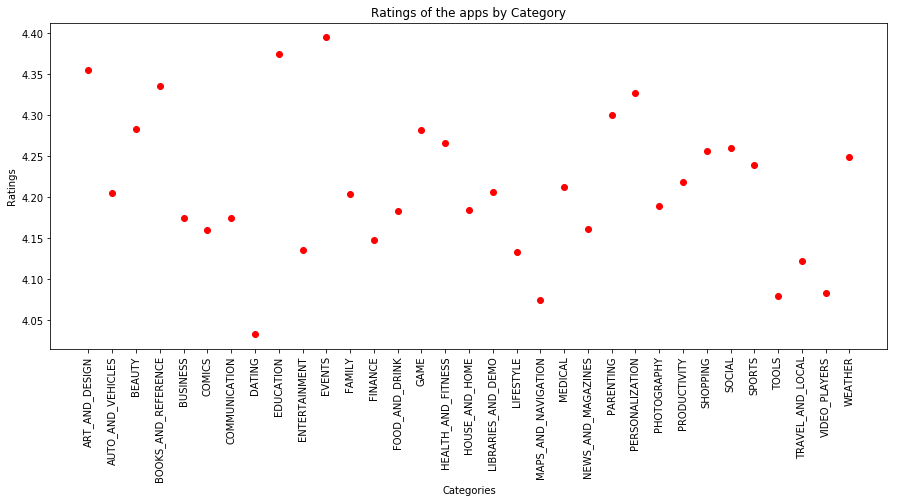

In [158]:

plt.figure(figsize=(15,6)) #increase the width of the graph
plt.plot(x, 'ro',color='r') #display in the form of bubbles with default color as red
plt.xticks(rotation=90) 
plt.title('Ratings of the apps by Category')
plt.xlabel('Categories')
plt.ylabel('Ratings')
plt.show()


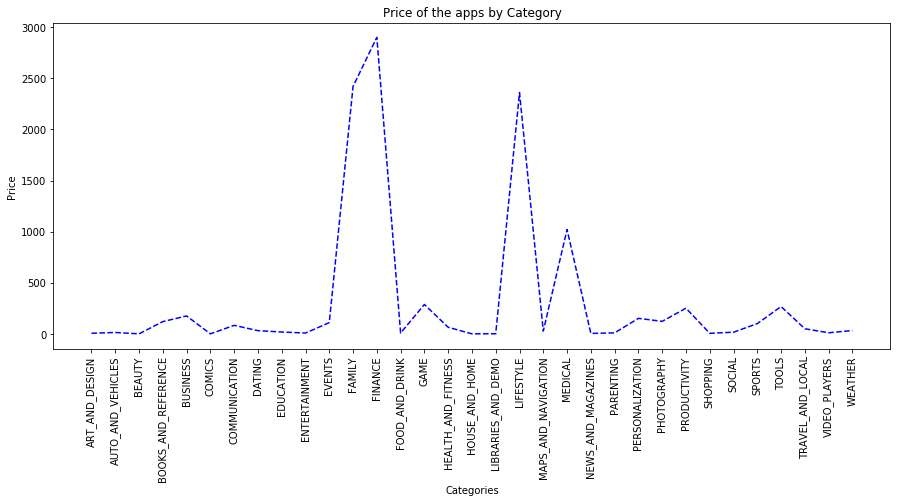

In [159]:
plt.figure(figsize=(15,6)) #increase the width of the graph
plt.plot(y, 'r--',color='b') #display in the form of dash with color as blue
plt.xticks(rotation=90) 
plt.title('Price of the apps by Category')
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()

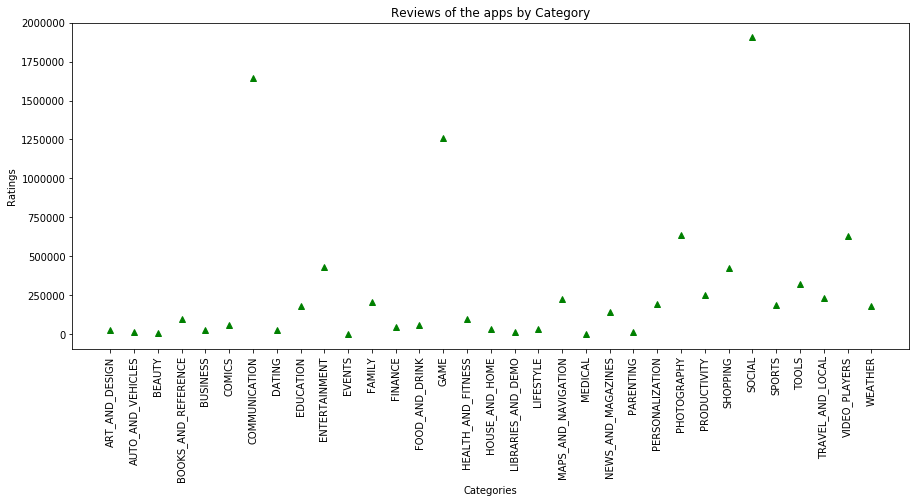

In [160]:
plt.figure(figsize=(15,6)) #increase the width of the graph
plt.plot(z, 'g^',color='g') #display in the form of bubbles with default color as red
plt.xticks(rotation=90) 
plt.title('Reviews of the apps by Category')
plt.xlabel('Categories')
plt.ylabel('Ratings')
plt.show()